In [109]:
pip install numpy scipy matplotlib


7457.85s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [110]:
# Import all our necessary libraries
import numpy as np
import scipy.optimize as sp
import matplotlib.pyplot as plt

# Read in data using np.loadtxt. It takes in two inputs, the path to the file and a delimiter. The delimiter in this case is ','.
# Your data should have five columns - elapsed time, ultrasonic sensor distance, acceleration in x direction, acceleration in y direction, acceleration in z direction
read_in_array1 = np.loadtxt('Trial 1.txt', delimiter=',')
read_in_array2 = np.loadtxt('Trial 2.txt', delimiter=',')
read_in_array3 = np.loadtxt('Trial 3.txt', delimiter=',')
read_in_array4 = np.loadtxt('Trial 4.txt', delimiter=',')
read_in_array5 = np.loadtxt('Trial 5.txt', delimiter=',')
read_in_array6 = np.loadtxt('Trial 6.txt', delimiter=',')
read_in_array7 = np.loadtxt('Trial 7.txt', delimiter=',')
print("hello")
print("hello2")
print("aidan was here! ! ! ! ! !cookie ")

hello
hello2
aidan was here! ! ! ! ! !cookie 


In [111]:
measuredangle = 8.24
measuredangleRad = 8.24*np.pi/180
g = 9.81

In [112]:
#We can calculate theoretical acceleration with gsintheta
mass = 0.613

In [113]:
# Take all of the elements in the 0th column to create your x-axis array
time = read_in_array1[:,0]

# Elapsed time is typically always going to be the x-axis
# We are converting it from units of ms to s.
elapsed_time = (time-time[0]) / 1000.

# We create an array to store the acceleration in x - the axis along which simple harmonic motion takes place
acc_data_unrefined = read_in_array1[:,2]

# We define our calibration function from calibrating our accelerometer (we need to input the slope and intercept here)
def output_to_accel_x(output):
  accel = 0.00057755*output - 0.53512604
  return accel

acc_data = output_to_accel_x(acc_data_unrefined) - g*np.sin(measuredangleRad)

Text(0.5, 0, 'Time (s)')

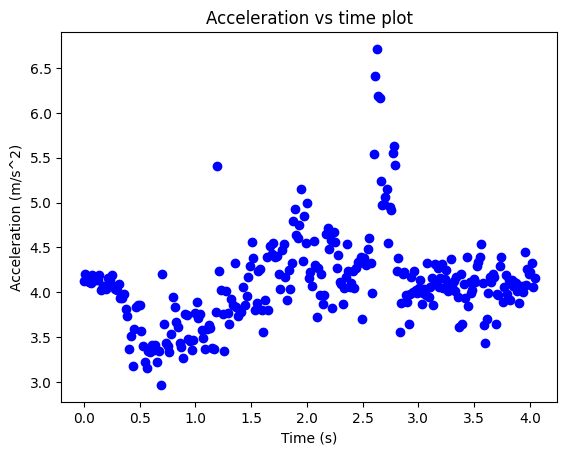

In [114]:

elapsed_time_window = elapsed_time
acc_data_window = acc_data

#plt.scatter(elapsed_time_window,acc_data_window,color="blue")
plt.scatter(elapsed_time,acc_data_window,color="blue")

# Provide a title to the plot
plt.title('Acceleration vs time plot')
# Label the y-axis
plt.ylabel('Acceleration (m/s^2)')
# Label the x-axis
plt.xlabel('Time (s)')

Text(0.5, 0, 'Time (s)')

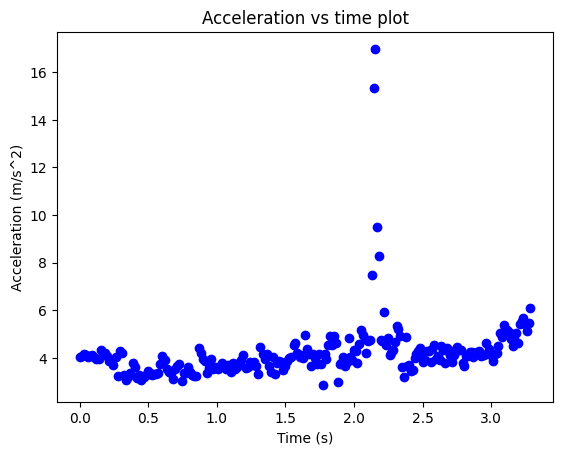

In [115]:

time2 = read_in_array2[:,0]

elapsed_time2 = (time2-time2[0]) / 1000.


acc_data_unrefined2 = read_in_array2[:,2]
acc_data2 = output_to_accel_x(acc_data_unrefined2) - g*np.sin(measuredangleRad)



#plt.scatter(elapsed_time_window,acc_data_window,color="blue")
plt.scatter(elapsed_time2,acc_data2,color="blue")

plt.title('Acceleration vs time plot')
plt.ylabel('Acceleration (m/s^2)')
plt.xlabel('Time (s)')

Text(0.5, 0, 'Time (s)')

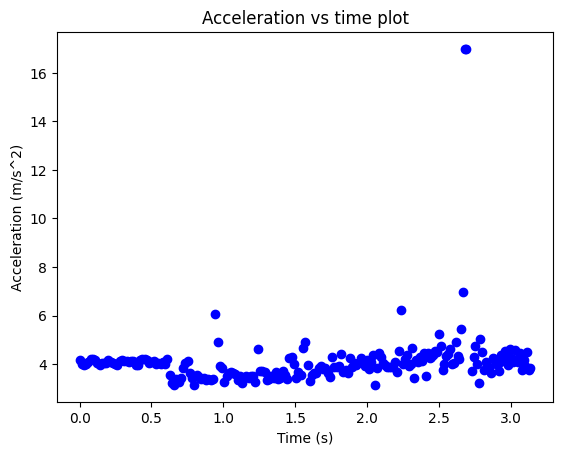

In [116]:

time3 = read_in_array3[:,0]

elapsed_time3 = (time3-time3[0]) / 1000.


acc_data_unrefined3 = read_in_array3[:,2]
acc_data3 = output_to_accel_x(acc_data_unrefined3) - g*np.sin(measuredangleRad)


#plt.scatter(elapsed_time_window,acc_data_window,color="blue")
plt.scatter(elapsed_time3,acc_data3,color="blue")

plt.title('Acceleration vs time plot')
plt.ylabel('Acceleration (m/s^2)')
plt.xlabel('Time (s)')

Text(0.5, 0, 'Time (s)')

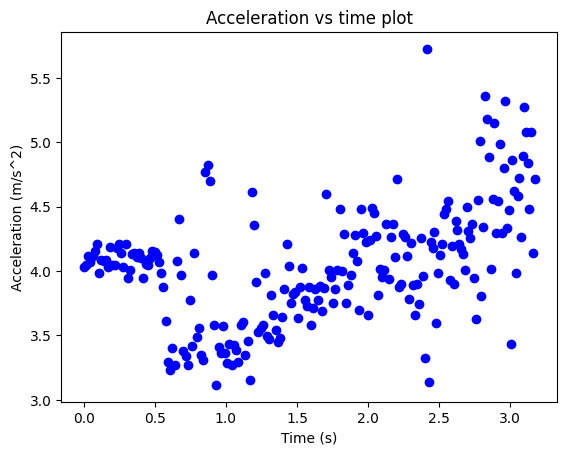

In [117]:

time4 = read_in_array4[:,0]

elapsed_time4 = (time4-time4[0]) / 1000.


acc_data_unrefined4 = read_in_array4[:,2]
acc_data4 = output_to_accel_x(acc_data_unrefined4) - g*np.sin(measuredangleRad)


#plt.scatter(elapsed_time_window,acc_data_window,color="blue")
plt.scatter(elapsed_time4,acc_data4,color="blue")

plt.title('Acceleration vs time plot')
plt.ylabel('Acceleration (m/s^2)')
plt.xlabel('Time (s)')

Text(0.5, 0, 'Time (s)')

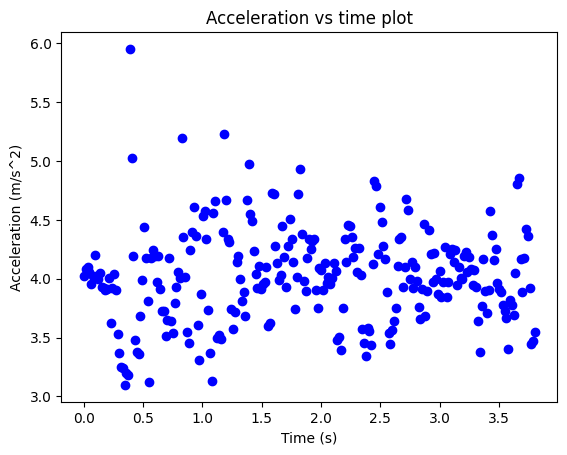

In [118]:

time5 = read_in_array5[:,0]

elapsed_time5 = (time5-time5[0]) / 1000.


acc_data_unrefined5 = read_in_array5[:,2]
acc_data5 = output_to_accel_x(acc_data_unrefined5) - g*np.sin(measuredangleRad)


#plt.scatter(elapsed_time_window,acc_data_window,color="blue")
plt.scatter(elapsed_time5,acc_data5,color="blue")

plt.title('Acceleration vs time plot')
plt.ylabel('Acceleration (m/s^2)')
plt.xlabel('Time (s)')

Text(0.5, 0, 'Time (s)')

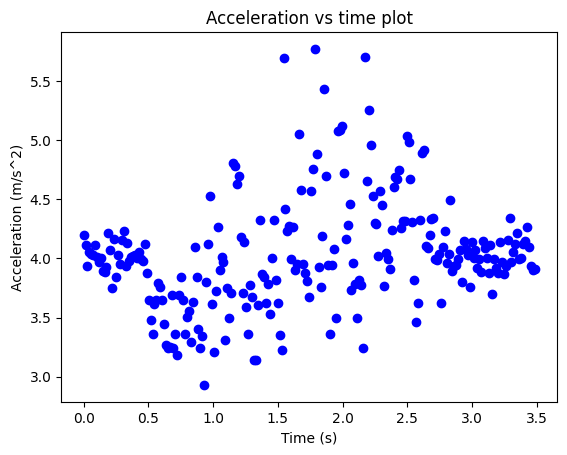

In [119]:

time6 = read_in_array6[:,0]

elapsed_time6 = (time6-time6[0]) / 1000.


acc_data_unrefined6 = read_in_array6[:,2]
acc_data6 = output_to_accel_x(acc_data_unrefined6) - g*np.sin(measuredangleRad)


#plt.scatter(elapsed_time_window,acc_data_window,color="blue")
plt.scatter(elapsed_time6,acc_data6,color="blue")

plt.title('Acceleration vs time plot')
plt.ylabel('Acceleration (m/s^2)')
plt.xlabel('Time (s)')

Text(0.5, 0, 'Time (s)')

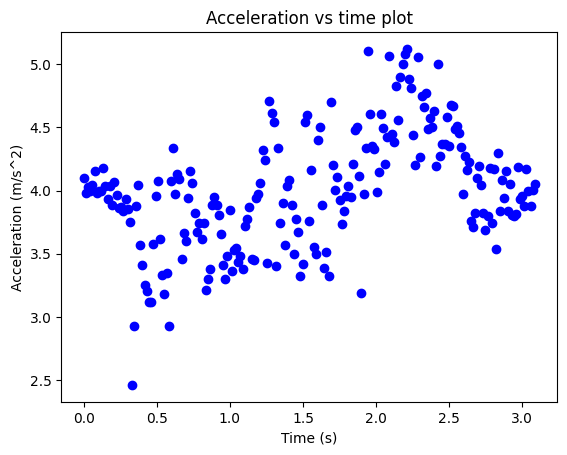

In [120]:

time7 = read_in_array7[:,0]

elapsed_time7 = (time7-time7[0]) / 1000.


acc_data_unrefined7 = read_in_array7[:,2]
acc_data7 = output_to_accel_x(acc_data_unrefined7) - g*np.sin(measuredangleRad)


#plt.scatter(elapsed_time_window,acc_data_window,color="blue")
plt.scatter(elapsed_time7,acc_data7,color="blue")

plt.title('Acceleration vs time plot')
plt.ylabel('Acceleration (m/s^2)')
plt.xlabel('Time (s)')

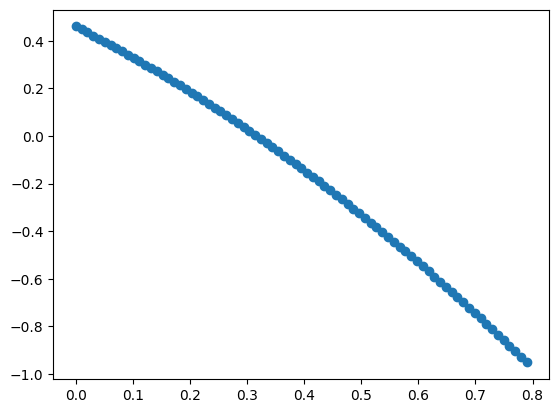

In [121]:
#This is the motion fucntion without any air Resistance
tIdeal = np.linspace(0, .79, 79)
positionIdeal=1/2*(-9.8)*np.sin(measuredangleRad)*tIdeal**2 -np.sqrt(2*(9.8)*np.sin(measuredangleRad)*.54)*tIdeal+.46
plt.scatter(tIdeal,positionIdeal)


In [122]:
ultrasonic1=read_in_array1[:,1]
ultrasonic2=read_in_array2[:,1]
ultrasonic3=read_in_array3[:,1]
ultrasonic4=read_in_array4[:,1]
ultrasonic5=read_in_array5[:,1]
ultrasonic6=read_in_array6[:,1]
ultrasonic7=read_in_array7[:,1]
ultrasonic1meters=ultrasonic1/100
ultrasonic2meters=ultrasonic2/100
ultrasonic3meters=ultrasonic3/100
ultrasonic4meters=ultrasonic4/100
ultrasonic5meters=ultrasonic5/100
ultrasonic6meters=ultrasonic6/100
ultrasonic7meters=ultrasonic7/100


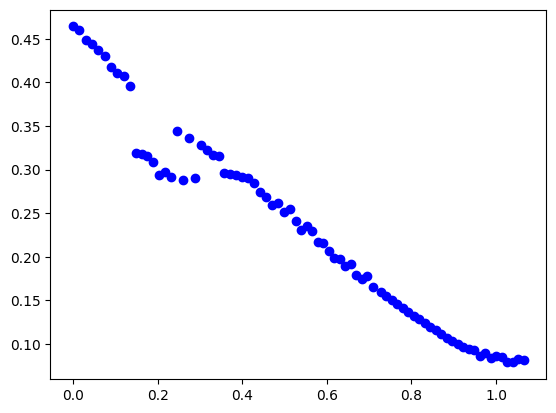

In [123]:
timewindow=time[111:190]
timewindowseconds=(timewindow-timewindow[0])/1000
ultrasonic1window=ultrasonic1meters[111:190]


plt.scatter(timewindowseconds,ultrasonic1window,color="blue")


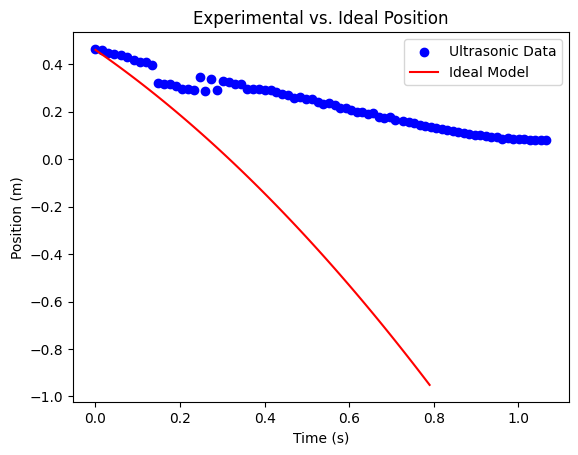

In [124]:
plt.scatter(timewindowseconds, ultrasonic1window, color="blue", label="Ultrasonic Data")
plt.plot(tIdeal, positionIdeal, color="red", label="Ideal Model")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Experimental vs. Ideal Position")
plt.legend()
plt.show()

In [125]:
#I'm going to do 2 different graphs: 
# 1)graph as if the air flow caused a constant acceleration
# 2)graph as if the air flow caused a sort of decay quadratic

In [131]:
#This function finds first initial veloctiy from first 5 points of USS data

def initialVelocity(timewindowseconds, ultrasonicwindow):
    N = 5
    t_start = timewindowseconds[:N]
    x_start = ultrasonicwindow[:N]
    coeffs = np.polyfit(t_start, x_start, 1)
    v0 = initialVelocity(timewindowseconds, ultrasonic1window)
    print(f"Initial velocity: {v0:.4f} m/s")
    return coeffs[0]


def positionConstAccel(time,initialVelocity,initialPosition,ForceAir):
    x=(1/2*(-9.8)*np.sin(measuredangleRad)-ForceAir/mass)*time**2+initialVelocity*time+initialPosition
    return x

In [ ]:
ForceAirGuess=3
plt.plot(positionConstAccel(timewindowseconds,initialVelocity(timewindowseconds,ultrasonic1window),ultrasonic1window[0],ForceAirGuess),
         timewindowseconds, label="Constant Accleration", color="green")
plt.scatter(timewindowseconds, ultrasonic1window, color="blue", label="Ultrasonic Data")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Experimental vs. Constant Accleration")
plt.legend()
plt.show()

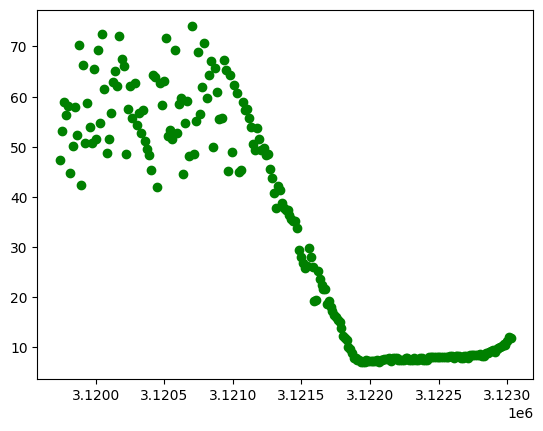

In [128]:
plt.scatter(time2,ultrasonic2,color="green")


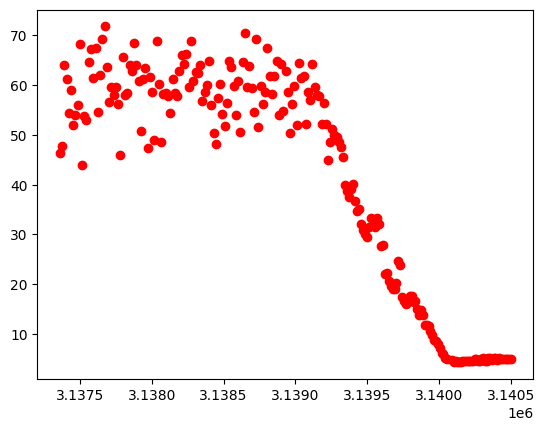

In [129]:
plt.scatter(time3,ultrasonic3,color="red")

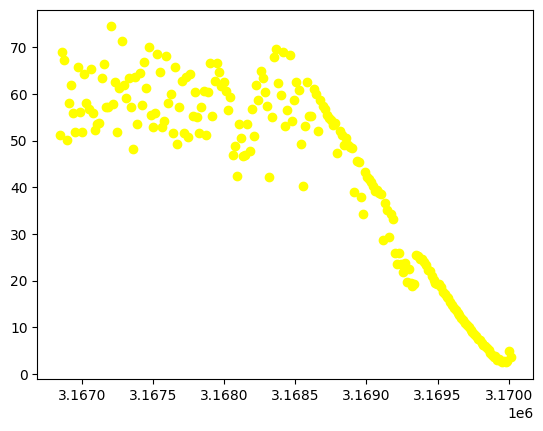

In [130]:
plt.scatter(time4,ultrasonic4,color="yellow")